In [1]:
from   collections import Counter
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from   pathlib import Path
from   pprint import pprint
import seaborn as sns

%matplotlib inline

In [2]:
csv_path = Path("../data/survey_results_public.csv")
schema_path = Path("../data/survey_results_schema.csv")

In [3]:
df = pd.read_csv(csv_path, low_memory=False)
schema = pd.read_csv(schema_path)

In [4]:
is_phd = df.FormalEducation.fillna('Not reported').str.contains('Other doctoral degree')
is_compsci = df.UndergradMajor.fillna('Not reported').str.contains('Computer science')

cols = [
    'CompanySize',         #check
    'DevType',             #oh yeah
    'YearsCoding',         #check
    'YearsCodingProf',     #check
    'ConvertedSalary',
    'EducationTypes',      #uh huh
    'LanguageWorkedWith',  #yup
    'WakeTime',            #check
    'HoursComputer',       #check
    'HoursOutside',        #check
    'SkipMeals',           #check
    'Exercise',            #check
    'Age',                 #check
    'Dependents',          #check
]

df1 = df.loc[is_phd & ~is_compsci, cols]

In [5]:
df1.shape

(1449, 14)

In [6]:
df1.isnull().sum()

CompanySize           299
DevType               131
YearsCoding            36
YearsCodingProf       320
ConvertedSalary       666
EducationTypes        255
LanguageWorkedWith    165
WakeTime              219
HoursComputer         220
HoursOutside          223
SkipMeals             222
Exercise              220
Age                   310
Dependents            346
dtype: int64

In [7]:
df1.isnull().all(axis=1).sum()

32

In [8]:
df1 = df1.dropna(axis=0, how='all')
df1 = df1.dropna(axis=0, how='any', subset=['ConvertedSalary'])
df1 = df1.reset_index()

In [9]:
df1.head()

,index,CompanySize,DevType,YearsCoding,YearsCodingProf,ConvertedSalary,EducationTypes,LanguageWorkedWith,WakeTime,HoursComputer,HoursOutside,SkipMeals,Exercise,Age,Dependents
0,236,"1,000 to 4,999 employees",Designer;Embedded applications or devices deve...,9-11 years,9-11 years,440592.0,Received on-the-job training in software devel...,Assembly;C;C++;Matlab;Python;Bash/Shell,Between 6:01 - 7:00 AM,9 - 12 hours,3 - 4 hours,Never,Daily or almost every day,35 - 44 years old,Yes
1,347,100 to 499 employees,Data scientist or machine learning specialist,15-17 years,9-11 years,113000.0,Taken an online course in programming or softw...,Groovy;Python;R;SQL;HTML;CSS;Bash/Shell,Between 6:01 - 7:00 AM,5 - 8 hours,30 - 59 minutes,1 - 2 times per week,I don't typically exercise,35 - 44 years old,Yes
2,390,10 to 19 employees,Back-end developer;Database administrator;Fron...,6-8 years,3-5 years,80000.0,"Taught yourself a new language, framework, or ...",JavaScript;Python;SQL;HTML;CSS;Bash/Shell,Between 6:01 - 7:00 AM,9 - 12 hours,30 - 59 minutes,Never,3 - 4 times per week,25 - 34 years old,No
3,393,20 to 99 employees,Data scientist or machine learning specialist,9-11 years,6-8 years,36720.0,Taken an online course in programming or softw...,C++;Python;R,Between 7:01 - 8:00 AM,9 - 12 hours,1 - 2 hours,Never,3 - 4 times per week,25 - 34 years old,No
4,398,"5,000 to 9,999 employees",Data scientist or machine learning specialist;...,12-14 years,6-8 years,54507.0,"Taught yourself a new language, framework, or ...",C++;Julia;Python,Between 7:01 - 8:00 AM,9 - 12 hours,1 - 2 hours,Never,1 - 2 times per week,25 - 34 years old,No


In [10]:
df1.shape

(783, 15)

In [11]:
pprint(list(df1.CompanySize.unique()))

['1,000 to 4,999 employees',
 '100 to 499 employees',
 '10 to 19 employees',
 '20 to 99 employees',
 '5,000 to 9,999 employees',
 '500 to 999 employees',
 '10,000 or more employees',
 'Fewer than 10 employees',
 nan]


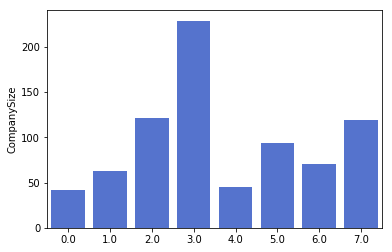

In [12]:
company_size_mapping = {
    'Fewer than 10 employees': 0,
    '10 to 19 employees': 1,
    '20 to 99 employees': 2,
    '100 to 499 employees': 3,
    '500 to 999 employees': 4,
    '1,000 to 4,999 employees': 5,
    '5,000 to 9,999 employees': 6,
    '10,000 or more employees': 7,
    np.nan: np.nan,
}

company_size = df1.CompanySize.map(company_size_mapping)
company_size = company_size.fillna(company_size.median())

sns.barplot(x=company_size.value_counts().index, y=company_size.value_counts(), color='royalblue')
plt.show()

In [13]:
pprint(list(df1.YearsCoding.unique()))

['9-11 years',
 '15-17 years',
 '6-8 years',
 '12-14 years',
 '21-23 years',
 '3-5 years',
 '30 or more years',
 '18-20 years',
 '24-26 years',
 '27-29 years',
 '0-2 years']


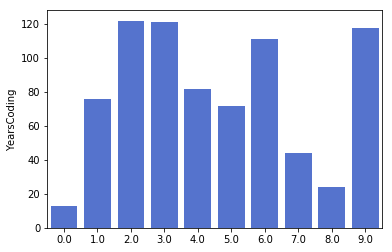

In [14]:
years_coding_mapping = {
    '0-2 years': 0,
    '3-5 years': 1,
    '6-8 years': 2,
    '9-11 years': 3,
    '12-14 years': 4,
    '15-17 years': 5,
    '18-20 years': 6,
    '21-23 years': 6,
    '24-26 years': 7,
    '27-29 years': 8,
    '30 or more years': 9,
    np.nan: np.nan,
}

years_coding = df1.YearsCoding.map(years_coding_mapping)
years_coding = years_coding.fillna(years_coding.median())

sns.barplot(x=years_coding.value_counts().index, y=years_coding.value_counts(), color='royalblue')
plt.show()

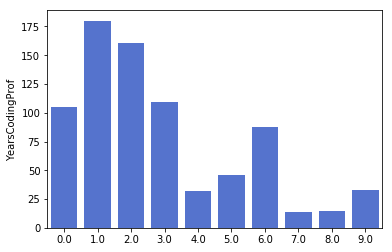

In [15]:
years_coding_prof = df1.YearsCodingProf.map(years_coding_mapping)
years_coding_prof = years_coding_prof.fillna(years_coding_prof.median())

sns.barplot(x=years_coding_prof.value_counts().index, y=years_coding_prof.value_counts(), color='royalblue')
plt.show()

In [16]:
pprint(list(df1.WakeTime.unique()))

['Between 6:01 - 7:00 AM',
 'Between 7:01 - 8:00 AM',
 'Between 9:01 - 10:00 AM',
 'Between 8:01 - 9:00 AM',
 nan,
 'Between 5:00 - 6:00 AM',
 'Before 5:00 AM',
 'I do not have a set schedule',
 'Between 10:01 - 11:00 AM',
 'Between 11:01 AM - 12:00 PM',
 'After 12:01 PM',
 'I work night shifts']


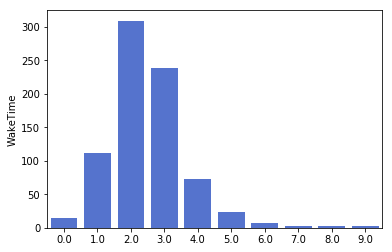

In [17]:
wake_time_mapping = {
    'Before 5:00 AM': 0,
    'Between 5:00 - 6:00 AM': 1,
    'Between 6:01 - 7:00 AM': 2,
    'Between 7:01 - 8:00 AM': 3,
    'Between 8:01 - 9:00 AM': 4,
    'Between 9:01 - 10:00 AM': 5,
    'Between 10:01 - 11:00 AM': 6,
    'Between 11:01 AM - 12:00 PM': 7,
    'After 12:01 PM': 8,
    'I work night shifts': 9,
    'I do not have a set schedule': np.nan,
    np.nan: np.nan,
}

wake_time = df1.WakeTime.map(wake_time_mapping)
wake_time = wake_time.fillna(wake_time.median())

sns.barplot(x=wake_time.value_counts().index, y=wake_time.value_counts(), color='royalblue')
plt.show()

In [18]:
pprint(list(df1.HoursComputer.unique()))

['9 - 12 hours', '5 - 8 hours', nan, '1 - 4 hours', 'Over 12 hours']


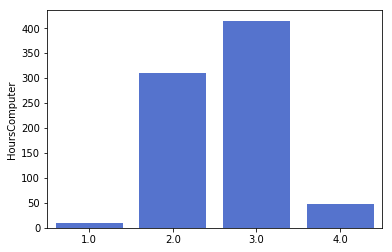

In [19]:
hours_computer_mapping = {
    'Less than 1 hour': 0,
    '1 - 4 hours': 1,
    '5 - 8 hours': 2,
    '9 - 12 hours': 3,
    'Over 12 hours': 4,
    np.nan: np.nan,
}

hours_computer = df1.HoursComputer.map(hours_computer_mapping)
hours_computer = hours_computer.fillna(hours_computer.median())

sns.barplot(x=hours_computer.value_counts().index, y=hours_computer.value_counts(), color='royalblue')
plt.show()

In [20]:
pprint(list(df1.HoursOutside.unique()))

['3 - 4 hours',
 '30 - 59 minutes',
 '1 - 2 hours',
 'Less than 30 minutes',
 nan,
 'Over 4 hours']


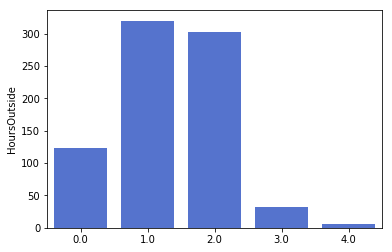

In [21]:
hours_outside_mapping = {
    'Less than 30 minutes': 0,
    '30 - 59 minutes': 1,
    '1 - 2 hours': 2,
    '3 - 4 hours': 3,
    'Over 4 hours': 4,
    np.nan: np.nan,
}

hours_outside = df1.HoursOutside.map(hours_outside_mapping)
hours_outside = hours_outside.fillna(hours_outside.median())

sns.barplot(x=hours_outside.value_counts().index, y=hours_outside.value_counts(), color='royalblue')
plt.show()

In [22]:
pprint(list(df1.SkipMeals.unique()))

['Never',
 '1 - 2 times per week',
 nan,
 '3 - 4 times per week',
 'Daily or almost every day']


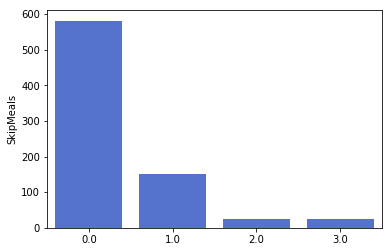

In [23]:
skip_meals_mapping = {
    'Never': 0,
    '1 - 2 times per week': 1,
    '3 - 4 times per week': 2,
    'Daily or almost every day': 3,
    np.nan: np.nan,
}

skip_meals = df1.SkipMeals.map(skip_meals_mapping)
skip_meals = skip_meals.fillna(skip_meals.median())

sns.barplot(x=skip_meals.value_counts().index, y=skip_meals.value_counts(), color='royalblue')
plt.show()

In [24]:
pprint(list(df1.Exercise.unique()))

['Daily or almost every day',
 "I don't typically exercise",
 '3 - 4 times per week',
 '1 - 2 times per week',
 nan]


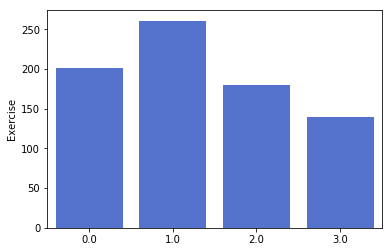

In [25]:
exercise_mapping = {
    "I don't typically exercise": 0,
    '1 - 2 times per week': 1,
    '3 - 4 times per week': 2,
    'Daily or almost every day': 3,
     np.nan: np.nan,
}

exercise = df1.Exercise.map(exercise_mapping)
exercise = exercise.fillna(exercise.median())

sns.barplot(x=exercise.value_counts().index, y=exercise.value_counts(), color='royalblue')
plt.show()

In [26]:
pprint(list(df1.Age.unique()))

['35 - 44 years old',
 '25 - 34 years old',
 '45 - 54 years old',
 nan,
 '55 - 64 years old',
 '65 years or older',
 '18 - 24 years old']


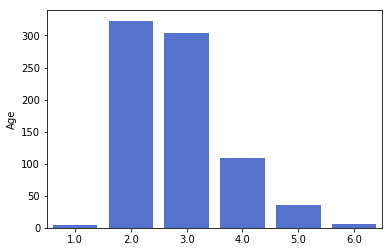

In [27]:
age_mapping = {
    'Under 18 years old': 0,
    '18 - 24 years old': 1,
    '25 - 34 years old': 2,
    '35 - 44 years old': 3,
    '45 - 54 years old': 4,
    '55 - 64 years old': 5,
    '65 years or older': 6,
    np.nan: np.nan, 
}

age = df1.Age.map(age_mapping)
age = age.fillna(age.median())

sns.barplot(x=age.value_counts().index, y=age.value_counts(), color='royalblue')
plt.show()

In [28]:
pprint(list(df1.Dependents.unique()))

['Yes', 'No', nan]


In [29]:
dependents = pd.get_dummies(df1.Dependents, prefix='Dependents')

In [30]:
dev_list = []
for entry in df1.DevType:
    if entry is np.nan:
        pass
    else:
        dev_list.extend(entry.split(';'))

dev_counter = Counter(dev_list)
dev_type_cols = sorted(dev_counter.keys())
dev_counter

Counter({'Designer': 55,
         'Embedded applications or devices developer': 38,
         'Data scientist or machine learning specialist': 382,
         'Back-end developer': 319,
         'Database administrator': 67,
         'Front-end developer': 124,
         'Full-stack developer': 226,
         'System administrator': 87,
         'Educator or academic researcher': 189,
         'Data or business analyst': 162,
         'Desktop or enterprise applications developer': 123,
         'Engineering manager': 48,
         'Product manager': 33,
         'DevOps specialist': 56,
         'QA or test developer': 37,
         'Student': 15,
         'C-suite executive (CEO, CTO, etc.)': 26,
         'Marketing or sales professional': 6,
         'Mobile developer': 57,
         'Game or graphics developer': 18})

In [31]:
class DefaultEntry:
    
    def __init__(self, keys, default_value=0):
        self._keys = keys
        self._default_value = default_value
        self._row_dict = {key: default_value for key in keys}
        
    def to_dict(self):
        return self._row_dict

    def to_df(self):
        return pd.DataFrame(self._row_dict)
    
    

dev_types = []
for entry in df1.DevType:
    if entry is np.nan:
        dev_types.append(DefaultEntry(dev_type_cols).to_dict())
    else:
        new_entry = DefaultEntry(dev_type_cols).to_dict()
        new_entry.update(dict(Counter(entry.split(';'))))
        dev_types.append(new_entry)
        
dev_types = pd.DataFrame(dev_types)

dev_types.head()

,Back-end developer,"C-suite executive (CEO, CTO, etc.)",Data or business analyst,Data scientist or machine learning specialist,Database administrator,Designer,Desktop or enterprise applications developer,DevOps specialist,Educator or academic researcher,Embedded applications or devices developer,Engineering manager,Front-end developer,Full-stack developer,Game or graphics developer,Marketing or sales professional,Mobile developer,Product manager,QA or test developer,Student,System administrator
0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1
3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [32]:
education_list = []
for entry in df1.EducationTypes:
    if entry is np.nan:
        pass
    else:
        education_list.extend(entry.split(';'))

education_counter = Counter(education_list)
education_cols = sorted(education_counter.keys())
education_counter

Counter({'Received on-the-job training in software development': 275,
         'Participated in a hackathon': 176,
         'Contributed to open source software': 403,
         'Taken an online course in programming or software development (e.g. a MOOC)': 396,
         'Taught yourself a new language, framework, or tool without taking a formal course': 708,
         'Taken a part-time in-person course in programming or software development': 111,
         'Participated in online coding competitions (e.g. HackerRank, CodeChef, TopCoder)': 138,
         'Completed an industry certification program (e.g. MCPD)': 61,
         'Participated in a full-time developer training program or bootcamp': 59})

In [33]:
education_types = []
for entry in df1.EducationTypes:
    if entry is np.nan:
        education_types.append(DefaultEntry(education_cols).to_dict())
    else:
        new_entry = DefaultEntry(education_cols).to_dict()
        new_entry.update(dict(Counter(entry.split(';'))))
        education_types.append(new_entry)
        
education_types = pd.DataFrame(education_types)

education_types.head()

,Completed an industry certification program (e.g. MCPD),Contributed to open source software,Participated in a full-time developer training program or bootcamp,Participated in a hackathon,"Participated in online coding competitions (e.g. HackerRank, CodeChef, TopCoder)",Received on-the-job training in software development,Taken a part-time in-person course in programming or software development,Taken an online course in programming or software development (e.g. a MOOC),"Taught yourself a new language, framework, or tool without taking a formal course"
0,0,1,0,1,0,1,0,0,0
1,0,0,0,0,0,1,0,1,1
2,0,1,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,1


In [34]:
language_list = []
for entry in df1.LanguageWorkedWith:
    if entry is np.nan:
        pass
    else:
        language_list.extend(entry.split(';'))

language_counter = Counter(language_list)
language_cols = sorted(language_counter.keys())
language_counter

Counter({'Assembly': 41,
         'C': 191,
         'C++': 274,
         'Matlab': 151,
         'Python': 510,
         'Bash/Shell': 419,
         'Groovy': 23,
         'R': 238,
         'SQL': 341,
         'HTML': 338,
         'CSS': 308,
         'JavaScript': 331,
         'Julia': 33,
         'Java': 212,
         'C#': 140,
         'VB.NET': 17,
         'Visual Basic 6': 13,
         'Go': 42,
         'PHP': 98,
         'Scala': 52,
         'VBA': 36,
         'Objective-C': 35,
         'TypeScript': 58,
         'F#': 18,
         'Ruby': 59,
         'Haskell': 31,
         'Perl': 65,
         'Rust': 18,
         'Lua': 23,
         'Clojure': 15,
         'CoffeeScript': 13,
         'Swift': 30,
         'Hack': 1,
         'Ocaml': 6,
         'Kotlin': 21,
         'Erlang': 7,
         'Delphi/Object Pascal': 17,
         'Cobol': 1})

In [35]:
languages = []
for entry in df1.LanguageWorkedWith:
    if entry is np.nan:
        languages.append(DefaultEntry(language_cols).to_dict())
    else:
        new_entry = DefaultEntry(language_cols).to_dict()
        new_entry.update(dict(Counter(entry.split(';'))))
        languages.append(new_entry)
        
languages = pd.DataFrame(languages)

languages.head()

,Assembly,Bash/Shell,C,C#,C++,CSS,Clojure,Cobol,CoffeeScript,Delphi/Object Pascal,...,R,Ruby,Rust,SQL,Scala,Swift,TypeScript,VB.NET,VBA,Visual Basic 6
0,1,1,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,1,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0
2,0,1,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [36]:
converted_salary = df1.ConvertedSalary.copy()

df2 = pd.concat([
    company_size,
    years_coding,
    years_coding_prof,
    wake_time,
    hours_computer,
    hours_outside,
    skip_meals,
    exercise,
    age,
    dependents,
    dev_types,
    education_types,
    languages,
    converted_salary,
], axis=1)

df2.shape

(783, 79)

## Finally doing it!!!

In [37]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

In [38]:
df2.columns

Index(['CompanySize', 'YearsCoding', 'YearsCodingProf', 'WakeTime',
       'HoursComputer', 'HoursOutside', 'SkipMeals', 'Exercise', 'Age',
       'Dependents_No', 'Dependents_Yes', 'Back-end developer',
       'C-suite executive (CEO, CTO, etc.)', 'Data or business analyst',
       'Data scientist or machine learning specialist',
       'Database administrator', 'Designer',
       'Desktop or enterprise applications developer', 'DevOps specialist',
       'Educator or academic researcher',
       'Embedded applications or devices developer', 'Engineering manager',
       'Front-end developer', 'Full-stack developer',
       'Game or graphics developer', 'Marketing or sales professional',
       'Mobile developer', 'Product manager', 'QA or test developer',
       'Student', 'System administrator',
       'Completed an industry certification program (e.g. MCPD)',
       'Contributed to open source software',
       'Participated in a full-time developer training program or bootcamp',
 

In [39]:
X = df2.drop(axis=1, labels='ConvertedSalary')
y = df2.ConvertedSalary

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lm = LinearRegression(normalize=True)
lm.fit(X_train, y_train)
y_train_pred = lm.predict(X_train)
y_test_pred = lm.predict(X_test)

train_r2_score = r2_score(y_train, y_train_pred)
train_mse = r2_score(y_test, y_test_pred)
test_r2_score = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

print(f"Train R2: {train_r2_score}")
print(f"Train MSE: {train_mse}")
print(f"Test R2: {test_r2_score}")
print(f"Test MSE: {test_mse}")

Train R2: 0.1468780870392028
Train MSE: -0.7526291177523694
Test R2: 40896676977.37118
Test MSE: 22097988933.15338


In [40]:
from sklearn.metrics import explained_variance_score
explained_variance_score(y_test, y_test_pred)

-0.7025090998210537

In [41]:
from sklearn.ensemble import RandomForestRegressor

tree = RandomForestRegressor()
tree.fit(X_train, y_train)
tree.score(X_test, y_test)

/Users/joshtice/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


-1.3105044463823505

Drop outliers?

In [42]:
df3 = df2[df2.ConvertedSalary < 250000]

In [43]:
X = df3.drop(axis=1, labels='ConvertedSalary')
y = df3.ConvertedSalary

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lm = LinearRegression(normalize=True)
lm.fit(X_train, y_train)
y_train_pred = lm.predict(X_train)
y_test_pred = lm.predict(X_test)

train_r2_score = r2_score(y_train, y_train_pred)
train_mse = r2_score(y_test, y_test_pred)
test_r2_score = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

print(f"Train R2: {train_r2_score}")
print(f"Train MSE: {train_mse}")
print(f"Test R2: {test_r2_score}")
print(f"Test MSE: {test_mse}")

Train R2: 0.37012660863020885
Train MSE: 0.0783681667008751
Test R2: 1357287886.001069
Test MSE: 1781843282.4427464


In [44]:
y_tree_pred = tree.predict(X_test)

In [45]:
pprint(list(df3.columns))

['CompanySize',
 'YearsCoding',
 'YearsCodingProf',
 'WakeTime',
 'HoursComputer',
 'HoursOutside',
 'SkipMeals',
 'Exercise',
 'Age',
 'Dependents_No',
 'Dependents_Yes',
 'Back-end developer',
 'C-suite executive (CEO, CTO, etc.)',
 'Data or business analyst',
 'Data scientist or machine learning specialist',
 'Database administrator',
 'Designer',
 'Desktop or enterprise applications developer',
 'DevOps specialist',
 'Educator or academic researcher',
 'Embedded applications or devices developer',
 'Engineering manager',
 'Front-end developer',
 'Full-stack developer',
 'Game or graphics developer',
 'Marketing or sales professional',
 'Mobile developer',
 'Product manager',
 'QA or test developer',
 'Student',
 'System administrator',
 'Completed an industry certification program (e.g. MCPD)',
 'Contributed to open source software',
 'Participated in a full-time developer training program or bootcamp',
 'Participated in a hackathon',
 'Participated in online coding competitions (e

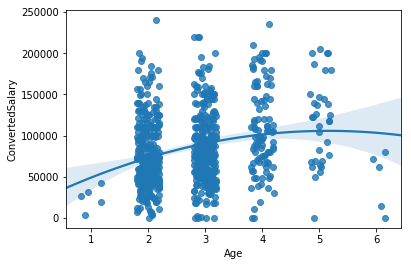

In [60]:
sns.regplot(df3.Age, df3.ConvertedSalary, order=2, x_jitter=0.2)
plt.show()

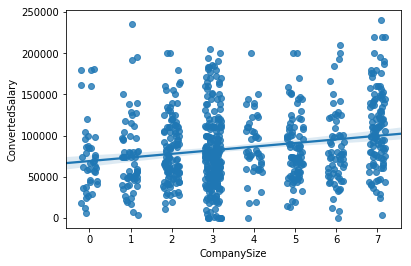

In [63]:
sns.regplot(df3.CompanySize, df3.ConvertedSalary, x_jitter=0.2)
plt.show()

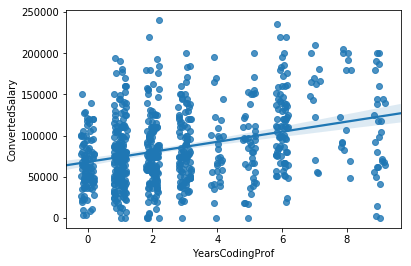

In [64]:
sns.regplot(df3.YearsCodingProf, df3.ConvertedSalary, x_jitter=0.2)
plt.show()

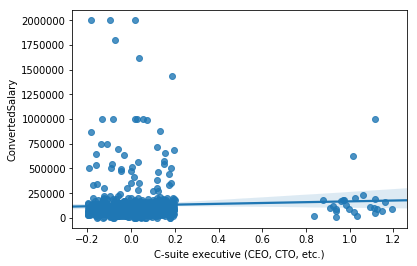

In [67]:
sns.regplot(df2['C-suite executive (CEO, CTO, etc.)'], df2.ConvertedSalary, x_jitter=0.2)
plt.show()

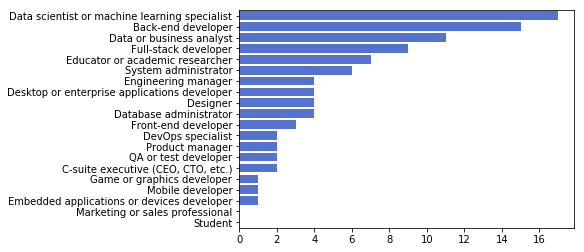

In [85]:
job_cols = [
    'Back-end developer',
    'C-suite executive (CEO, CTO, etc.)',
    'Data or business analyst',
    'Data scientist or machine learning specialist',
    'Database administrator',
    'Designer',
    'Desktop or enterprise applications developer',
    'DevOps specialist',
    'Educator or academic researcher',
    'Embedded applications or devices developer',
    'Engineering manager',
    'Front-end developer',
    'Full-stack developer',
    'Game or graphics developer',
    'Marketing or sales professional',
    'Mobile developer',
    'Product manager',
    'QA or test developer',
    'Student',
    'System administrator',
]
rich_jobs = df2.loc[df2.ConvertedSalary > 500000, job_cols].sum()
sns.barplot(rich_jobs.sort_values(ascending=False), rich_jobs.sort_values(ascending=False).index, color='royalblue')
plt.show()

In [90]:
df2.loc[df2.ConvertedSalary > 1500000, 'R']

177    0
418    0
421    1
573    0
587    0
Name: R, dtype: int64